## INTRODUCTION TO MACHINE LEARNING

In [1]:
import pandas as pd
import numpy as np
import quandl,math, datetime
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')

In [5]:
quandl.ApiConfig.api_key = "mcseWdy4Juq_2h8ux3ss"
df = quandl.get("WIKI/GOOGL")
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [6]:
## Selecting feature variables from the dataset
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0
...,...,...,...,...,...
2018-03-21,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0
2018-03-22,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0
2018-03-23,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0


In [7]:
## Getting the percent volatility for the day 
df['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100
## Getting the stoke price percent change for the day
df['PCT_Change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_Change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792,1.183658
...,...,...,...,...,...,...,...
2018-03-21,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0,1.343693,0.130884
2018-03-22,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0,2.921711,-2.487014
2018-03-23,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0,3.918952,-2.360729


In [8]:
## Selecting new fearures that has a defined relationship to help simple linear regression have a better prediction
df = df[['Adj. Close','HL_PCT','PCT_Change','Adj. Volume',]]
df

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0
...,...,...,...,...
2018-03-21,1094.000000,1.343693,0.130884,1990515.0
2018-03-22,1053.150000,2.921711,-2.487014,3418154.0
2018-03-23,1026.550000,3.918952,-2.360729,2413517.0


In [9]:
# Selecting the label
forcast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.001*len(df)))
df['Label'] = df[forcast_col].shift(-forecast_out)
df.head()

C:\Users\Winner\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\Winner\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Adj. Close,HL_PCT,PCT_Change,Adj. Volume,Label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,53.164113
2004-08-20,54.322689,0.710922,7.227007,22834300.0,54.122070
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,53.239345
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,51.162935
2004-08-25,53.164113,1.886792,1.183658,9188600.0,51.343492


In [10]:
# Passing selected feature and label to X and y respectively
X = np.array(df.drop(['Label'],1))

In [11]:
# Scaling X(feature) to have a common scale point across all the data piont
X = preprocessing.scale(X)
X = X[:-forecast_out]# grabs data for the last days depending on the size of the df
X_lately = X[-forecast_out:]# grabs data for days ahead depending on the size of the df
df.dropna(inplace=True)
y = np.array(df['Label'])

C:\Users\Winner\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
# Checking to see if data records across X and y are the same
print(len(X),len(y))

3420 3420


In [13]:
# Split X and y to training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [14]:
# Define our model classifier
clf = LinearRegression(n_jobs=-1) # (n_jobs: Number of jobs/threads that can be run at any given time)Tells how many trends you want the training to run under your CPU. (-1: run as many as you can)

#Fitting the training set to the classifier
clf.fit(X_train,y_train)

#save the mode to pickle
# with open('linerregression.pickle', 'wb') as f:
#     pickle.dump(clf,f)
    
pickle_in = open('linerregression.pickle','rb')
clf = pickle.load(pickle_in)

#Test our model with the test set
accuracy = clf.score(X_test,y_test)
accuracy

0.9965985852119144

In [15]:
#Predict pice fo the lately data
forecast_set = clf.predict(X_lately)
forecast_set

array([1136.01543314, 1101.59435242, 1097.45665777, 1096.11946266])

In [16]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day #next day

C:\Users\Winner\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

C:\Users\Winner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


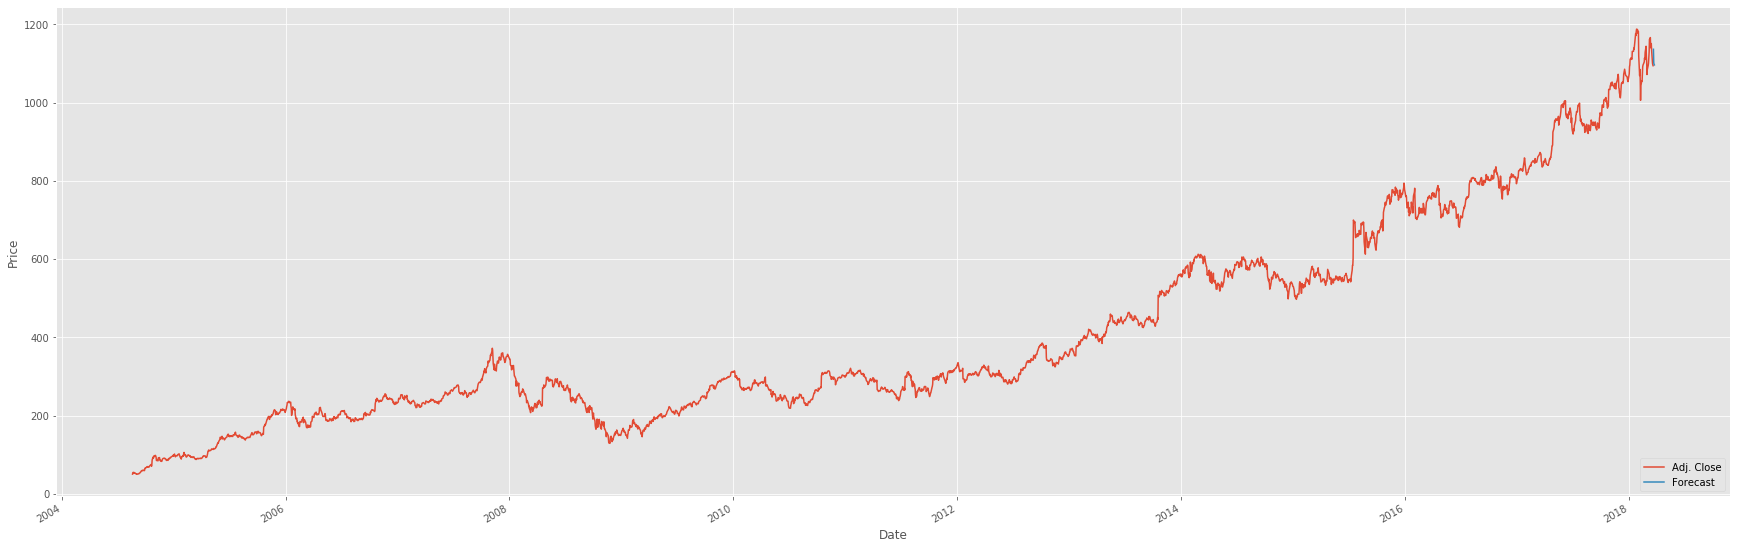

In [18]:
df['Adj. Close'].plot()
df['Forecast'].plot(figsize=(30, 10))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Building a linear regression from scratch

In [2]:
from statistics import mean

In [4]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

In [9]:
def best_fit_slope(xs,ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys) ) / ((mean(xs)**2) - mean(xs**2)) ) 
    return m
    
m = best_fit_slope(xs,ys)
m

0.42857142857142866